In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
# Create the pandas DataFrame
df = pd.read_csv(r"C:\Users\SurajShourie(BBDOAtl\Downloads\Final_Cohort.csv")

In [99]:
grouped_df = df.groupby(["stay_id","itemid_1", "subject_id"]).first().reset_index()
# grouped_df[grouped_df["stay_id"] == 34619075]
# grouped_df.to_csv(r"C:\Users\SurajShourie(BBDOAtl\Downloads\FinalCohort_firstInstanceOfDrug.csv", index=False)

In [100]:
r1_ =[ 'AMERICAN INDIAN/ALASKA NATIVE','ASIAN','ASIAN - ASIAN INDIAN','ASIAN - CHINESE','ASIAN - KOREAN','ASIAN - SOUTH EAST ASIAN','BLACK/AFRICAN','BLACK/AFRICAN AMERICAN','BLACK/CAPE VERDEAN','BLACK/CARIBBEAN ISLAND','HISPANIC OR LATINO','HISPANIC/LATINO - CENTRAL AMERICAN','HISPANIC/LATINO - COLUMBIAN','HISPANIC/LATINO - CUBAN','HISPANIC/LATINO - DOMINICAN','HISPANIC/LATINO - GUATEMALAN','HISPANIC/LATINO - HONDURAN','HISPANIC/LATINO - MEXICAN','HISPANIC/LATINO - PUERTO RICAN','HISPANIC/LATINO - SALVADORAN','MULTIPLE RACE/ETHNICITY','NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER','OTHER','PATIENT DECLINED TO ANSWER','PORTUGUESE','SOUTH AMERICAN','UNABLE TO OBTAIN','UNKNOWN','WHITE','WHITE - BRAZILIAN','WHITE - EASTERN EUROPEAN','WHITE - OTHER EUROPEAN','WHITE - RUSSIAN',]
g1_ = ['OTHER','ASIAN','ASIAN','ASIAN','ASIAN','ASIAN','BLACK','BLACK','BLACK','BLACK','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','HISPANIC/LATINO','OTHER','OTHER','OTHER','OTHER','OTHER','OTHER','OTHER','OTHER','WHITE','WHITE','WHITE','WHITE','WHITE',]
race_to_group_map =dict(zip(r1_, g1_))

g2_= ['fentanyl','hydromorphone','morphine','ketamine','lorazepam','midazolam','Propofol','dexmedetomidine','dexmedetomidine',]
r2_ = [221744,221833,225154,221712,221385,221668,222168,225150,229420]
item_to_drug_map =dict(zip(r2_, g2_))
grouped_df = grouped_df.merge(pd.DataFrame({"itemid_1": r2_, "drug_name": g2_}), on="itemid_1")
grouped_df = grouped_df.merge(pd.DataFrame({"race": r1_, "race_group": g1_}), on="race")
# grouped_df = grouped_df.assign(race_group=df['race'].map(race_to_group_map))
# grouped_df = grouped_df.assign(drug_name=df['itemid_1'].map(item_to_drug_map))
# grouped_df.to_csv(r"C:\Users\SurajShourie(BBDOAtl\Downloads\FinalCohort_firstInstanceOfDrug.csv", index=False)

In [98]:
# df["itemid_1"].unique(), grouped_df["itemid_1"].unique()
# len(grouped_df["drug_name"].unique()), len(grouped_df["itemid_1"].unique())
# grouped_df[grouped_df["itemid_1"]== 221668]["drug_name"]
# item_to_drug_map

# len(grouped_df["drug_name"].unique()), len(grouped_df["itemid_1"].unique())

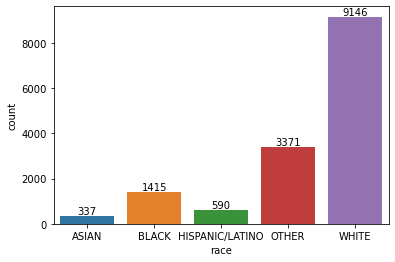

In [53]:
qwe1 = grouped_df.groupby(["race_group"])["race"].count().reset_index()
qwe1 = qwe1.rename(columns = {"race": "count", "race_group": "race"})
ax = sns.barplot(data=qwe1, x="race", y="count")
for i in ax.containers:
    ax.bar_label(i,)

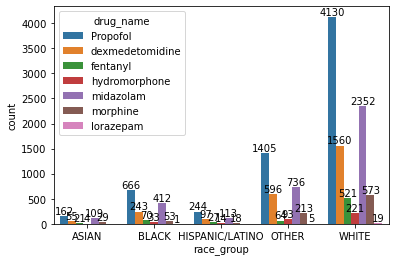

In [129]:
qwe2 = grouped_df.groupby(["race_group", "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
ax = sns.barplot(data=qwe2, x="race_group", y="count", hue="drug_name" )
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='drug_name', ylabel='race_group'>

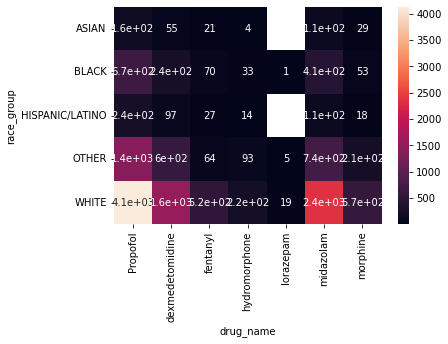

In [130]:
sns.heatmap(qwe2.pivot(index="race_group", columns="drug_name", values="count"), annot=True)

<AxesSubplot:xlabel='drug_name', ylabel='race_group'>

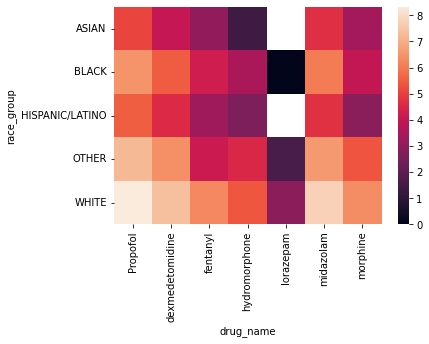

In [131]:
qwe2["log_count"] = np.log(qwe2["count"])
sns.heatmap(qwe2.pivot(index="race_group", columns="drug_name", values="log_count"))

<AxesSubplot:xlabel='race_group', ylabel='count'>

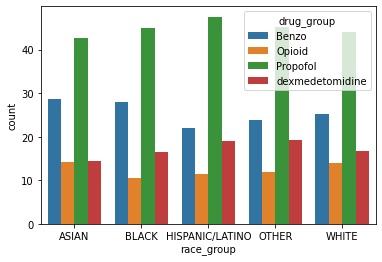

In [146]:
# sns.barplot(data=qwe3, x="race_group", y="count", hue="drug_name" )
arr1 = ['fentanyl','hydromorphone','morphine','ketamine','lorazepam','midazolam','Propofol','dexmedetomidine']
arr2 = ['Opioid','Opioid','Opioid','k','Benzo','Benzo','Propofol','dexmedetomidine']
qwe2 = grouped_df.groupby(["race_group", "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
qwe3 = qwe2.groupby(["race_group", "drug_name"]).agg({'count': 'sum'})
# qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
qwe4 = qwe3.merge(pd.DataFrame({"drug_name":arr1, "drug_group":arr2 }),on="drug_name")
qwe4 = qwe4.groupby(["race_group", "drug_group"])["count"].sum().reset_index()
sns.barplot(data=qwe4, x="race_group", y="count", hue="drug_group" )
# for i in ax.containers:
#     ax.bar_label(i,)

AttributeError: 'Rectangle' object has no property 'errorbar'

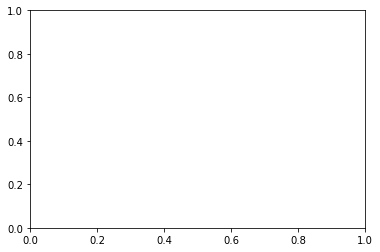

In [163]:
arr1 = ['fentanyl','hydromorphone','morphine','ketamine','lorazepam','midazolam','Propofol','dexmedetomidine']
arr2 = ['Opioid','Opioid','Opioid','k','Benzo','Benzo','Propofol','dexmedetomidine']
qwe2 = grouped_df.merge(pd.DataFrame({"drug_name":arr1, "drug_group":arr2 }),on="drug_name")
qwe2 = qwe2.groupby(["race_group", "drug_group"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
# qwe2.groupby(["race_group"]).apply(lambda x:100 * x / float(x.sum()))
qwe2["p"] = qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe2['q'] = 1- qwe2['p']
qwe2["%"] = qwe2["p"]*100
qwe2["error"] = np.sqrt((qwe2["p"] * qwe2["q"]) / qwe2["count"])
qwe2
sns.barplot(data=qwe2, x="race_group", y="%", hue="drug_group", errorbar=True )
# qwe3 = qwe2.groupby(["race_group", "drug_name"]).agg({'count': 'sum'})
# # qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
# qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
# qwe4 = qwe3.merge(pd.DataFrame({"drug_name":arr1, "drug_group":arr2 }),on="drug_name")
# qwe4 = qwe4.groupby(["race_group", "drug_group"])["count"].sum().reset_index()
# sns.barplot(data=qwe4, x="race_group", y="count", hue="drug_group" )

In [142]:
grouped_df.groupby(["race_group"])["race"].count()

race_group
ASIAN               380
BLACK              1478
HISPANIC/LATINO     513
OTHER              3112
WHITE              9376
Name: race, dtype: int64

### heatmaps

<AxesSubplot:xlabel='drug_name', ylabel='race_group'>

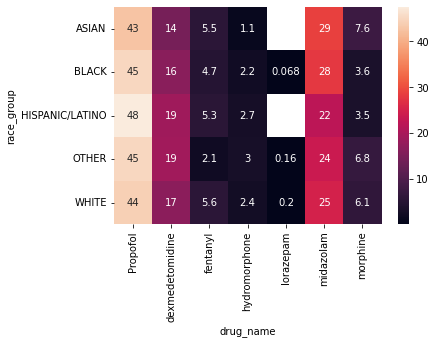

In [132]:
# qwe2.groupby(["race_group"]).size() / len(df)
qwe2 = grouped_df.groupby(["race_group", "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
qwe3 = qwe2.groupby(["race_group", "drug_name"]).agg({'count': 'sum'})
# qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
# sns.heatmap(qwe3)
sns.heatmap(qwe3.pivot(index="race_group", columns="drug_name", values="count"), annot=True)

<AxesSubplot:xlabel='drug_name', ylabel='insurance'>

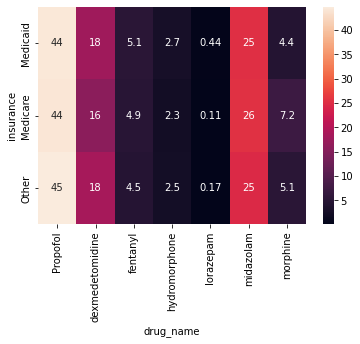

In [103]:
col = "insurance"
qwe2 = grouped_df.groupby([col, "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
qwe3 = qwe2.groupby([col, "drug_name"]).agg({'count': 'sum'})
# qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
# sns.heatmap(qwe3)
sns.heatmap(qwe3.pivot(index=col, columns="drug_name", values="count"), annot=True)

<AxesSubplot:xlabel='drug_name', ylabel='gender'>

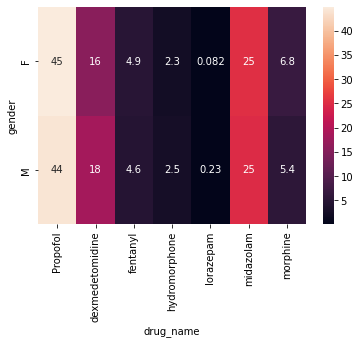

In [121]:
col = "gender"
qwe2 = grouped_df.groupby([col, "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
qwe3 = qwe2.groupby([col, "drug_name"]).agg({'count': 'sum'})
# qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
# sns.heatmap(qwe3)
sns.heatmap(qwe3.pivot(index=col, columns="drug_name", values="count"), annot=True)

<AxesSubplot:xlabel='drug_name', ylabel='first_careunit'>

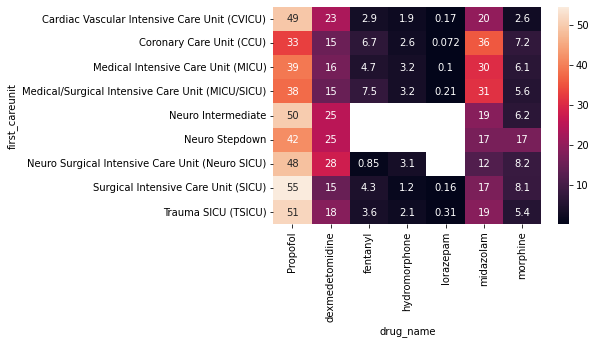

In [122]:
col = "first_careunit"
qwe2 = grouped_df.groupby([col, "drug_name"])["race"].count().reset_index()
qwe2 = qwe2.rename(columns= {"race": "count"})
qwe3 = qwe2.groupby([col, "drug_name"]).agg({'count': 'sum'})
# qwe3["percentage"] = 100*qwe2['count'] / qwe2.groupby('race_group')['count'].transform('sum')
qwe3 = qwe3.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
# sns.heatmap(qwe3)
sns.heatmap(qwe3.pivot(index=col, columns="drug_name", values="count"), annot=True)

In [107]:
grouped_df.groupby(["language"])["insurance"].count()

language
?           1557
ENGLISH    13302
Name: insurance, dtype: int64

In [123]:
path = r"C:\Users\SurajShourie(BBDOAtl\Downloads\xyz.csv"
grouped_df.groupby(["subject_id"]).first().groupby(["first_careunit"])["insurance"].count().reset_index()

,first_careunit,insurance
0,Cardiac Vascular Intensive Care Unit (CVICU),846
1,Coronary Care Unit (CCU),637
2,Medical Intensive Care Unit (MICU),1745
3,Medical/Surgical Intensive Care Unit (MICU/SICU),1083
4,Neuro Intermediate,9
5,Neuro Stepdown,4
6,Neuro Surgical Intensive Care Unit (Neuro SICU),164
7,Surgical Intensive Care Unit (SICU),1330
8,Trauma SICU (TSICU),1296


In [128]:
grouped_df.groupby(["drug_name"])["race"].count()

drug_name
Propofol           6607
dexmedetomidine    2551
fentanyl            703
hydromorphone       365
lorazepam            25
midazolam          3722
morphine            886
Name: race, dtype: int64